In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import *
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Siedlungsabfälle nach Abfallbewirtschaftungsmaßnahmen (env_wasmun)

[Data Explorere](https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=env_waspac&lang=de)

[Plastikmüll und Recycling in der EU: Zahlen und Fakten](https://www.europarl.europa.eu/news/de/headlines/society/20181212STO21610/plastikmull-und-recycling-in-der-eu-zahlen-und-fakten)


## Read in data

In [3]:
file_packaging_waste = "data/env_waspac.xls"

In [4]:
codes = get_header_codes_from_excel(file_packaging_waste)

In [5]:
print_codes(file_packaging_waste)

Category:  WASTE
---------
W15010401_IBA: Aluminium from incineration bottom ash (IBA)
W150107: Glass packaging
W150103: Wooden packaging
W150104: Metallic packaging
W150101: Paper and cardboard packaging
W150102: Plastic packaging
W15010402: Steel packaging
W150199: Other packaging
W15010401: Aluminium packaging
W15010402_IBA: Ferrous metal from incineration bottom ash (IBA)
W1501: Packaging

Category:  WST_OPER
---------
GEN: Waste generated
RCV: Recovery
RCY_NEU: Recycling outside the EU
RCY: Recycling
RCV_OTH: Recovery - other
RCY_EU_FOR: Recycling in other Member States of the EU
RCY_NAT: Recycling in the Member State 
RPR: Repair
RCV_E_PAC: Recovery - energy recovery from packaging waste

Category:  UNIT
---------
T: Tonne
PC: Percentage
KG_HAB: Kilograms per capita



In [0]:
df = get_data_from_excel(file_packaging_waste)

In [0]:
df

In [30]:
df.to_parquet("data/env_waspac_combined.parquet")

In [7]:
df_packaging_waste = pd.read_parquet("data/env_waspac_combined.parquet")

In [8]:
df_packaging_waste

,year,value,waste,wst_oper,unit
geo,,,,,
EU27_2020,2009,149.89,W1501,GEN,KG_HAB
EU28,2009,152.78,W1501,GEN,KG_HAB
BE,2009,152.11,W1501,GEN,KG_HAB
BG,2009,40.82,W1501,GEN,KG_HAB
CZ,2009,85.63,W1501,GEN,KG_HAB
...,...,...,...,...,...
SE,2018,NaN,W150199,RPR,PC
IS,2018,NaN,W150199,RPR,PC
LI,2018,NaN,W150199,RPR,PC


In [9]:
df_packaging_waste.year.unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [10]:
df_packaging_waste.describe(include=["category"])

,waste,wst_oper,unit
count,98010,98010,98010
unique,11,9,3
top,W1501,GEN,KG_HAB
freq,8910,10890,32670


## Packaging waste 2018

In [11]:
print_codes(file_packaging_waste)

Category:  WASTE
---------
W15010401_IBA: Aluminium from incineration bottom ash (IBA)
W150107: Glass packaging
W150103: Wooden packaging
W150104: Metallic packaging
W150101: Paper and cardboard packaging
W150102: Plastic packaging
W15010402: Steel packaging
W150199: Other packaging
W15010401: Aluminium packaging
W15010402_IBA: Ferrous metal from incineration bottom ash (IBA)
W1501: Packaging

Category:  WST_OPER
---------
GEN: Waste generated
RCV: Recovery
RCY_NEU: Recycling outside the EU
RCY: Recycling
RCV_OTH: Recovery - other
RCY_EU_FOR: Recycling in other Member States of the EU
RCY_NAT: Recycling in the Member State 
RPR: Repair
RCV_E_PAC: Recovery - energy recovery from packaging waste

Category:  UNIT
---------
T: Tonne
PC: Percentage
KG_HAB: Kilograms per capita



### Question 1:

Weniger als ein Drittel der Kunststoffabfälle in Europa wird recycelt. Unsere Infografik enthält interessante Zahlen und Fakten zum Thema Plastikmüll und Recycling in der EU.

Die Kunststoffproduktion ist in nur wenigen Jahrzehnten exponentiell gestiegen - weltweit von 1,5 Millionen Tonnen im Jahr 1950 auf 322 Millionen Tonnen im Jahr 2015. Damit ging auch ein Anstieg der Menge anfallenden Plastikmülls einher.

<AxesSubplot:title={'center':'Plastic packaging waste generation for EU28 over the past 10 years'}, xlabel='year', ylabel='waste generation [T]'>

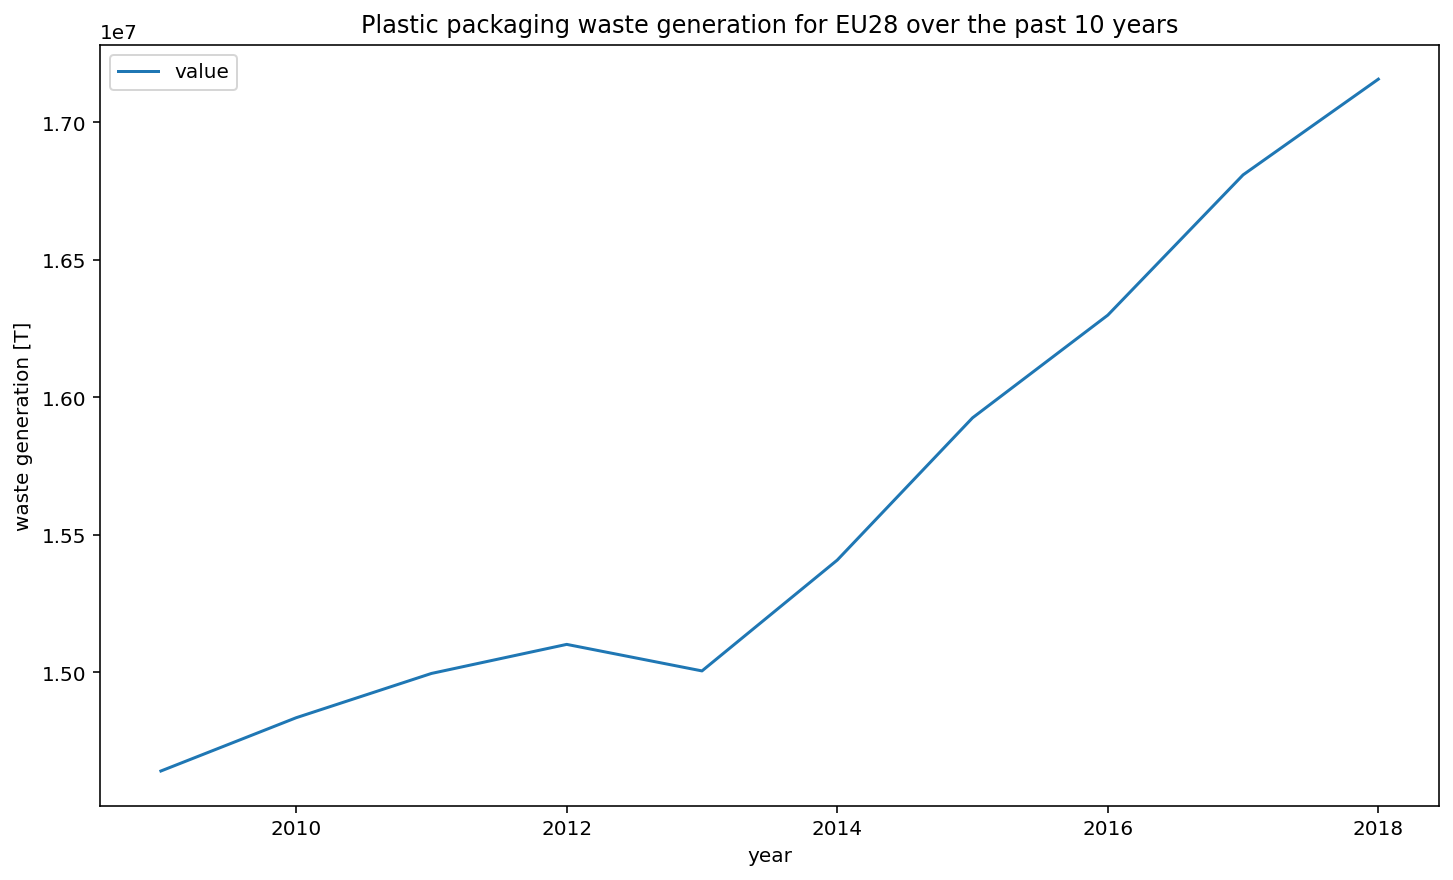

In [13]:
df_packaging_waste \
    .query("geo == 'EU28' and unit == 'T' and wst_oper == 'GEN' and waste == 'W150102'") \
    .plot(
        x="year",
        y="value",
        ylabel="waste generation [T]",
        title="Plastic packaging waste generation for EU28 over the past 10 years"
    )

<AxesSubplot:title={'center':'Plastic packaging waste generation for EU28 over the past 10 years'}, xlabel='year', ylabel='waste generation [KG/person]'>

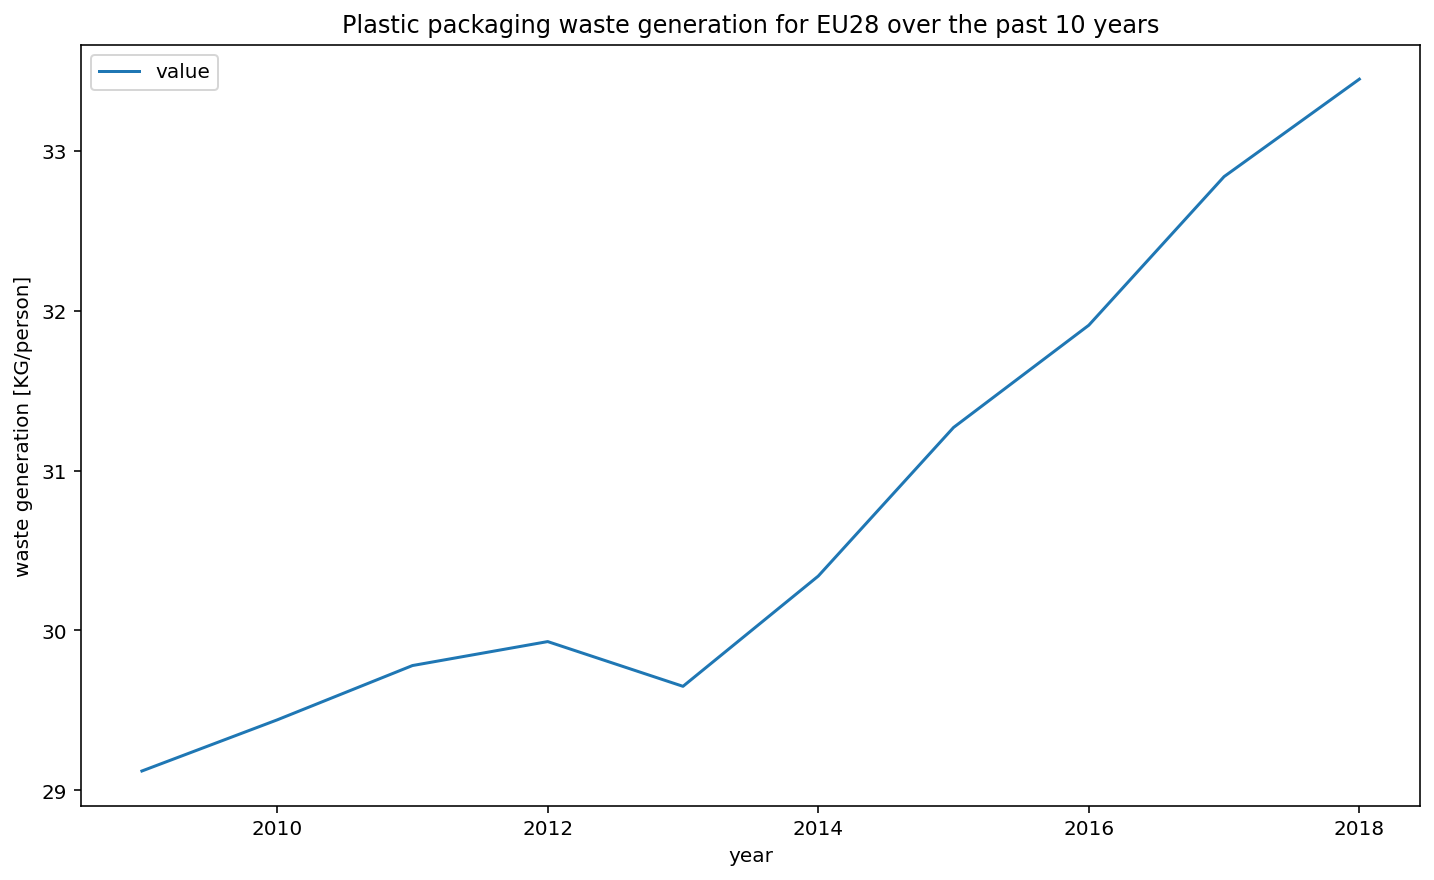

In [14]:
df_packaging_waste \
    .query("geo == 'EU28' and unit == 'KG_HAB' and wst_oper == 'GEN' and waste == 'W150102'") \
    .plot(
        x="year",
        y="value",
        ylabel="waste generation [KG/person]",
        title="Plastic packaging waste generation for EU28 over the past 10 years"
    )

In [17]:
df_ = df_packaging_waste.query("geo == 'EU28' and unit == 'T' and wst_oper == 'GEN' and waste != 'W1501'").replace(codes["WASTE"])  # compare with KG_HAB

px.bar(df_, x="year", y="value", color="waste")

In [0]:
# task: use plotly express animation feature to show this for different countries

## Question 2:
![](https://www.europarl.europa.eu/resources/library/images/20181130PHT20668/20181130PHT20668-cl.jpg)

In [18]:
df_packaing_waste_2016 = df_packaging_waste.query("geo != 'EU27_2020' and year == 2016 and waste in ['W150102'] and unit in ['T', 'KG_HAB'] and wst_oper in ['GEN']").reset_index()

In [26]:
fig = px.bar(
    df_packaing_waste_2016,
    x="geo",
    y="value",
    color="unit",
    facet_col="unit",
    title="Plastic waste generation in EU for 2016 by Tonne and Kilograms per person.",
)

fig.update_yaxes(matches=None)

In [120]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df1 = df_packaing_waste_2016.query("unit == 'T'")
df2 = df_packaing_waste_2016.query("unit == 'KG_HAB'")
sorting_order = df2.sort_values("value", ascending=False).geo.tolist()


# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])


fig.add_trace(
    go.Bar(
        x = df1.geo,
        y = df1.value,
        name = "Tonne",
        offsetgroup=1,
        marker_color="darkgreen"
    )
 )

fig.add_trace(
    go.Bar(
        x = df2.geo,
        y = df2.value,
        name = "Kg/person",
        offsetgroup=2,
        marker_color="orange"
    ),
    secondary_y=True
 )

# Add figure title
fig.update_layout(
    title_text="Plastic waste generation for EU28 in 2016",
    barmode='group',
    xaxis_tickangle=0,
    bargap=0.1, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1, # gap between bars of the same location coordinate.
    xaxis={'categoryorder': 'array', 'categoryarray': sorting_order}
)

fig.show()

In [27]:
df_packaging_waste_rcy_rate = df_packaging_waste.query("geo != 'EU27_2020' and year == 2016 and waste=='W150102' and wst_oper == 'RCY' and unit == 'PC'").reset_index()

In [29]:
px.bar(
    df_packaging_waste_rcy_rate.sort_values("value"), 
    x="geo", y="value",
    color="value",
    color_continuous_scale=px.colors.diverging.curl[::-1],
    color_continuous_midpoint=df_packaging_waste_rcy_rate.query("geo == 'EU28'").value[0],
    title="Plastic waste recycling rate in the EU for 2016"
)

In [0]:
# TODO: map